In [1]:
# Importación módulos
import sys
import numpy as np
np.set_printoptions(threshold=10000)
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ruta1 =  '../imgpack/Landsat C/Landsat_C_02-11_B.png'
ruta2 =  '../imgpack/Landsat C/Landsat_C_04-11_R.png'
ruta3 =  '../imgpack/Landsat C/Landsat_C_03-11_G.png'
ruta4 =  '../imgpack/Landsat C/Landsat_C_05-11_NIR.png'
B = cv.imread(ruta1,cv.IMREAD_GRAYSCALE)
R = cv.imread(ruta2,cv.IMREAD_GRAYSCALE)
G = cv.imread(ruta3,cv.IMREAD_GRAYSCALE)
NIR = cv.imread(ruta4,cv.IMREAD_GRAYSCALE)

In [8]:
def Histograma(img):
    resimg = img.copy()
    f,c = resimg.shape
    hst = [0]*256
    fig = plt.figure(figsize=(10, 10)) # Creamos nueva figura

    for x in range(f):
        for y in range(c):
            pixel=resimg[x,y]
            hst[pixel]+=1
    return hst

In [9]:
def expan(img, cmin, cmax):
    # Copiar imagen. 
    resimg = img.copy()
        
    # TODO: Código para el expan.
    i = 0
    while (i < img.shape[0]):
        j = 0
        while(j < img.shape[1]):
            if(img[i][j] < cmin):
                resimg[i][j] = 0
            elif(img[i][j] > cmax):
                resimg[i][j] = 255
            else:
                resimg[i][j] = 0 + ((img[i][j] - cmin) * (255 - 0)) / (cmax - cmin)
            j = j + 1
        i = i + 1
    
    return resimg
 
def corte(img, porc):    
    # TODO: Código para el corte de colas.
    his = Histograma(img)
    npx = sum(his)
    
    # Cálculo de cmin.
    cmin = 1;
    smin = his[cmin]
    while smin < porc*npx:
        cmin = cmin + 1
        smin = smin + his[cmin]
    
    cmax = 255;
    smax = his[cmax]
    while smax < porc*npx:
        cmax = cmax - 1
        smax = smax + his[cmax]
        
    resimg = expan(img, cmin, cmax)
      
    return resimg
 

In [4]:
#Función falso
def falso(band1,band2,band3):
    
    #Fusionamos bandas:
    img = cv.merge((band1,band2,band3)) # Merge usa bgr
    
    #Mostrar por pantalla la imagen
    fig = plt.figure(figsize=(15, 15)) # Creamos nueva figura
    fig.add_subplot(221)
    plt.imshow(img)
    plt.show()

### Imagen color verdadero

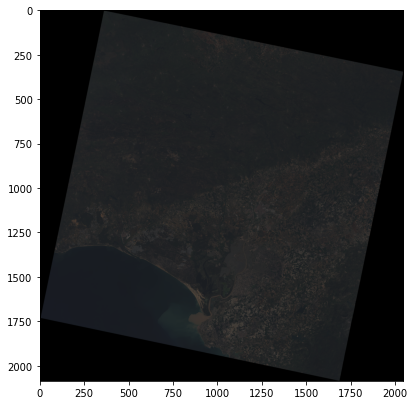

In [10]:
falso(R,G,B)

### Imagen falso color

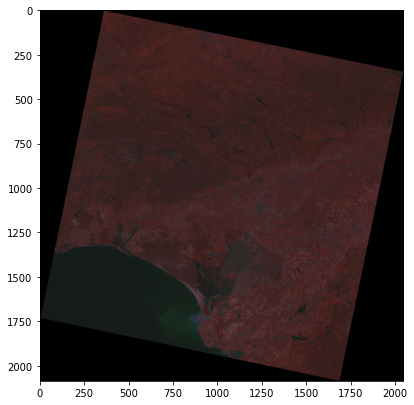

In [11]:
falso(NIR,G,R)

In [12]:
# Bandas habiéndole aplicado el corte de cola
BC=corte(B,0.01)
RC=corte(R,0.01)
GC=corte(G,0.01)
NIRC=corte(NIR,0.01)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

### Imagen color verdadero (con corte de cola)

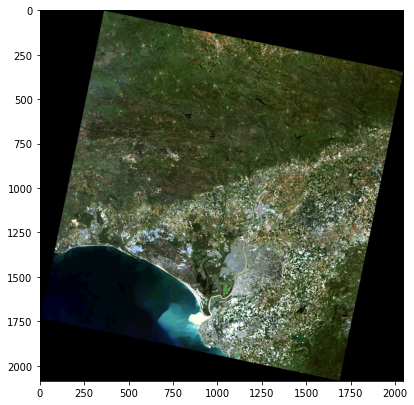

In [13]:
falso(RC,GC,BC)

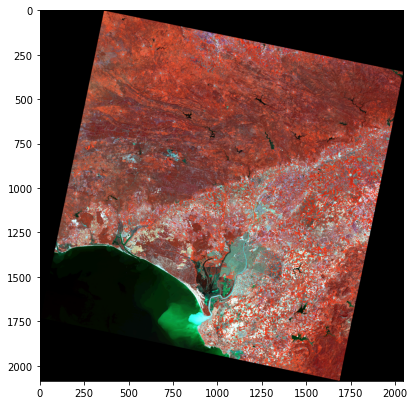

In [14]:
falso(NIRC,GC,RC)